In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

In [89]:
df = pd.read_csv("dataset\Quote-Equity-TCS-EQ-01-04-2024-to-01-04-2025.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,01-Apr-2025,EQ,"3,572.70","3,584.00","3,525.00","3,606.15","3,556.45","3,550.80","3,548.01","4,592.25","3,457.00","26,18,493","9,29,04,45,221.40","1,67,344"
1,28-Mar-2025,EQ,"3,651.00","3,660.95","3,591.90","3,651.20","3,604.00","3,606.15","3,613.75","4,592.25","3,457.00","20,51,919","7,41,51,24,946.40","1,29,740"
2,27-Mar-2025,EQ,"3,614.85","3,663.00","3,610.50","3,635.80","3,645.00","3,651.20","3,649.02","4,592.25","3,457.00","25,28,474","9,22,64,48,354.45","1,25,080"
3,26-Mar-2025,EQ,"3,647.75","3,680.50","3,625.85","3,657.75","3,630.55","3,635.80","3,656.16","4,592.25","3,457.00","17,34,499","6,34,15,97,992.40","1,41,204"
4,25-Mar-2025,EQ,"3,645.00","3,710.00","3,638.00","3,628.95","3,641.00","3,657.75","3,673.54","4,592.25","3,457.00","31,35,390","11,51,79,85,340.80","1,81,313"


In [90]:
df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          250 non-null    object
 1   series        250 non-null    object
 2   OPEN          250 non-null    object
 3   HIGH          250 non-null    object
 4   LOW           250 non-null    object
 5   PREV. CLOSE   250 non-null    object
 6   ltp           250 non-null    object
 7   close         250 non-null    object
 8   vwap          250 non-null    object
 9   52W H         250 non-null    object
 10  52W L         250 non-null    object
 11  VOLUME        250 non-null    object
 12  VALUE         250 non-null    object
 13  No of trades  250 non-null    object
dtypes: object(14)
memory usage: 27.5+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df = df.sort_values(by='Date')

In [93]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
249,2024-04-01,EQ,"3,897.70","3,933.30","3,888.05","3,876.30","3,924.00","3,916.75","3,905.77","4,254.75","3,070.25","15,69,676","6,13,07,99,234.60","1,42,337"
248,2024-04-02,EQ,"3,890.00","3,909.85","3,873.00","3,916.75","3,890.20","3,883.80","3,886.53","4,254.75","3,070.25","21,42,666","8,32,75,25,479.35","1,52,218"
247,2024-04-03,EQ,"3,851.00","3,981.00","3,851.00","3,883.80","3,950.05","3,947.30","3,940.47","4,254.75","3,070.25","39,73,090","15,65,58,36,798.60","2,32,561"
246,2024-04-04,EQ,"3,975.90","4,028.65","3,935.25","3,947.30","4,000.00","4,003.30","3,983.10","4,254.75","3,070.25","33,94,637","13,52,11,78,797.20","1,96,204"
245,2024-04-05,EQ,"3,978.00","4,002.00","3,960.50","4,003.30","3,983.00","3,979.25","3,983.17","4,254.75","3,070.25","16,36,819","6,51,97,23,297.55","95,801"


In [94]:
df.describe()

,Date
count,250
mean,2024-09-30 12:40:19.200000
min,2024-04-01 00:00:00
25%,2024-07-02 06:00:00
50%,2024-09-30 12:00:00
75%,2024-12-31 18:00:00
max,2025-04-01 00:00:00


In [95]:
columns_to_clean = ['OPEN','HIGH','LOW','PREV. CLOSE', 'ltp',  'close','vwap' ,'52W H' ,'52W L', 'VOLUME' ,'VALUE' ,'No of trades'  ]  # replace with your actual column names

for col in columns_to_clean:
    df[col] = df[col].str.replace(',', '', regex=False)

In [96]:
columns_to_clean = ['OPEN','HIGH','LOW','PREV. CLOSE', 'ltp',  'close','vwap' ,'52W H' ,'52W L', 'VOLUME' ,'VALUE' ,'No of trades'  ]  # replace with your actual column names

for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df = df.drop(columns=['series'])


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 249 to 0
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          250 non-null    datetime64[ns]
 1   OPEN          250 non-null    float64       
 2   HIGH          250 non-null    float64       
 3   LOW           250 non-null    float64       
 4   PREV. CLOSE   250 non-null    float64       
 5   ltp           250 non-null    float64       
 6   close         250 non-null    float64       
 7   vwap          250 non-null    float64       
 8   52W H         250 non-null    float64       
 9   52W L         250 non-null    float64       
 10  VOLUME        250 non-null    int64         
 11  VALUE         250 non-null    float64       
 12  No of trades  250 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 27.3 KB


In [98]:
df

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
249,2024-04-01,3897.70,3933.30,3888.05,3876.30,3924.00,3916.75,3905.77,4254.75,3070.25,1569676,6.130799e+09,142337
248,2024-04-02,3890.00,3909.85,3873.00,3916.75,3890.20,3883.80,3886.53,4254.75,3070.25,2142666,8.327525e+09,152218
247,2024-04-03,3851.00,3981.00,3851.00,3883.80,3950.05,3947.30,3940.47,4254.75,3070.25,3973090,1.565584e+10,232561
246,2024-04-04,3975.90,4028.65,3935.25,3947.30,4000.00,4003.30,3983.10,4254.75,3070.25,3394637,1.352118e+10,196204
245,2024-04-05,3978.00,4002.00,3960.50,4003.30,3983.00,3979.25,3983.17,4254.75,3070.25,1636819,6.519723e+09,95801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-03-25,3645.00,3710.00,3638.00,3628.95,3641.00,3657.75,3673.54,4592.25,3457.00,3135390,1.151799e+10,181313
3,2025-03-26,3647.75,3680.50,3625.85,3657.75,3630.55,3635.80,3656.16,4592.25,3457.00,1734499,6.341598e+09,141204
2,2025-03-27,3614.85,3663.00,3610.50,3635.80,3645.00,3651.20,3649.02,4592.25,3457.00,2528474,9.226448e+09,125080
1,2025-03-28,3651.00,3660.95,3591.90,3651.20,3604.00,3606.15,3613.75,4592.25,3457.00,2051919,7.415125e+09,129740


In [99]:
corel=df.corr()
corel

,Date,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,1.000000,-0.056351,-0.054357,-0.064542,-0.045871,-0.065173,-0.063969,-0.064484,0.861338,0.915404,-0.025834,-0.039453,-0.037635
OPEN,-0.056351,1.000000,0.991982,0.992454,0.995314,0.983242,0.982338,0.989479,0.335874,0.154120,-0.148811,-0.032985,-0.113634
HIGH,-0.054357,0.991982,1.000000,0.991843,0.988325,0.993591,0.993220,0.996943,0.336791,0.155501,-0.097433,0.021324,-0.060117
LOW,-0.064542,0.992454,0.991843,1.000000,0.989961,0.993229,0.992812,0.996792,0.329234,0.142905,-0.168577,-0.051369,-0.133517
PREV. CLOSE,-0.045871,0.995314,0.988325,0.989961,1.000000,0.980481,0.979314,0.986680,0.348835,0.161106,-0.164029,-0.049913,-0.126611
ltp,-0.065173,0.983242,0.993591,0.993229,0.980481,1.000000,0.999679,0.997908,0.326648,0.141199,-0.118244,0.000728,-0.078858
close,-0.063969,0.982338,0.993220,0.992812,0.979314,0.999679,1.000000,0.997786,0.326456,0.142020,-0.119539,-0.000368,-0.079306
vwap,-0.064484,0.989479,0.996943,0.996792,0.986680,0.997908,0.997786,1.000000,0.328144,0.143520,-0.130140,-0.011209,-0.092795
52W H,0.861338,0.335874,0.336791,0.329234,0.348835,0.326648,0.326456,0.328144,1.000000,0.792068,-0.102073,-0.072312,-0.108345
52W L,0.915404,0.154120,0.155501,0.142905,0.161106,0.141199,0.142020,0.143520,0.792068,1.000000,-0.055784,-0.042453,-0.041905


In [100]:
correlation_with_close = df.corr()['close'].sort_values(ascending=False)
print(correlation_with_close)

close           1.000000
ltp             0.999679
vwap            0.997786
HIGH            0.993220
LOW             0.992812
OPEN            0.982338
PREV. CLOSE     0.979314
52W H           0.326456
52W L           0.142020
VALUE          -0.000368
Date           -0.063969
No of trades   -0.079306
VOLUME         -0.119539
Name: close, dtype: float64


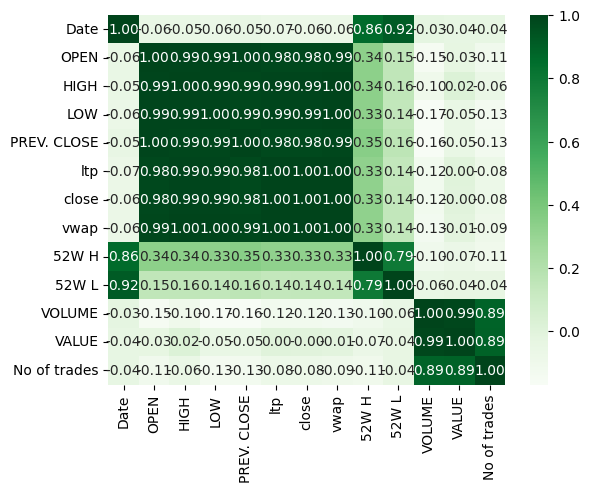

In [101]:
sns.heatmap(corel,annot= True,cmap= "Greens",fmt=".2f")
plt.show()

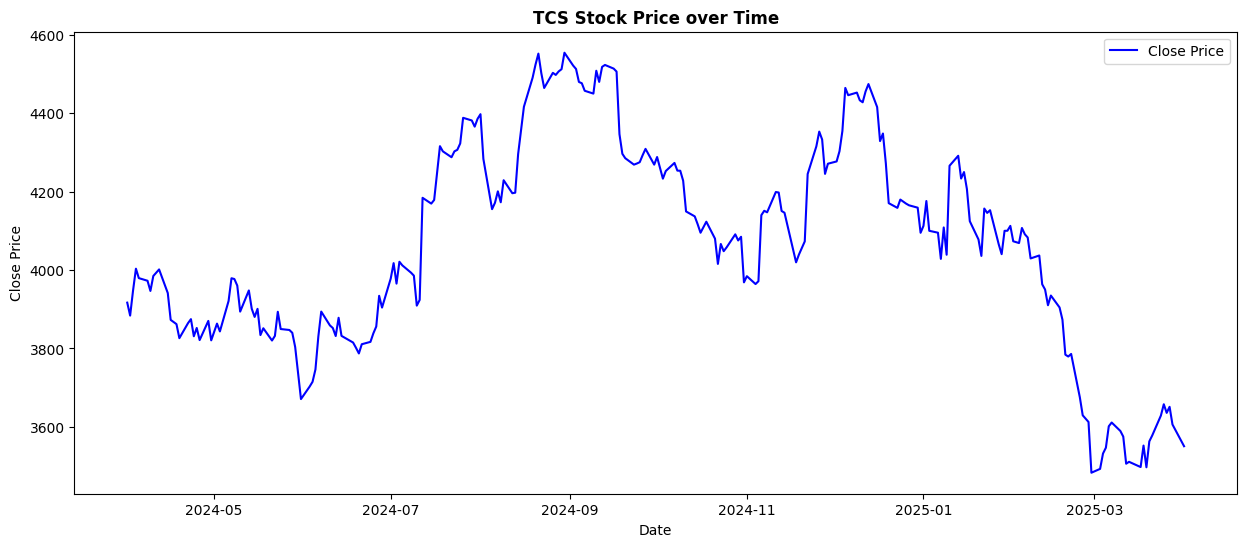

In [102]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['close'], label='Close Price',
color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('TCS Stock Price over Time',weight = "bold")
plt.legend()
plt.show()

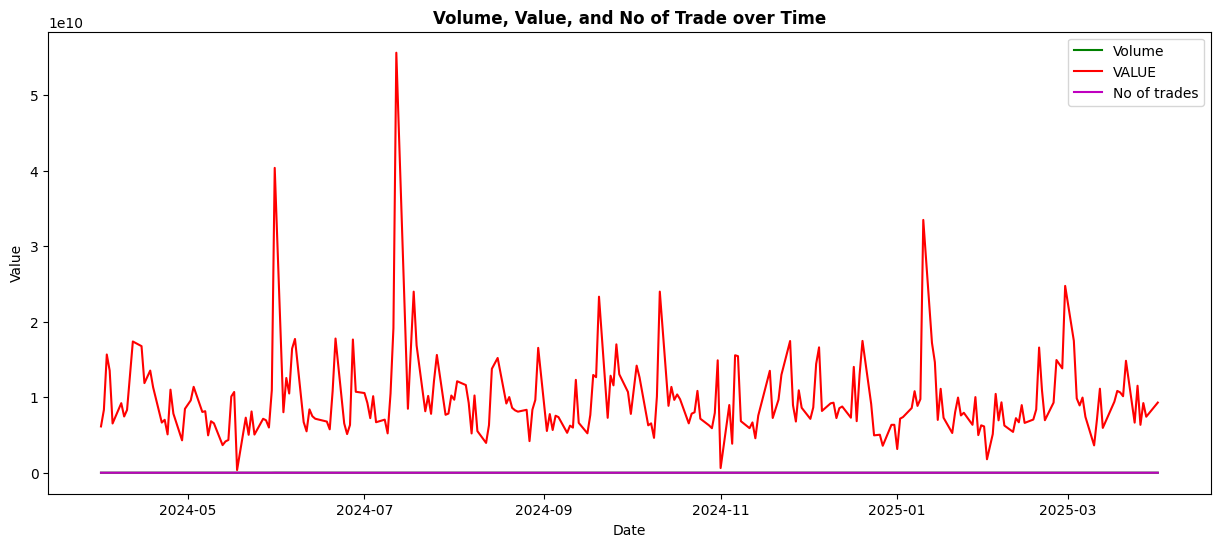

In [103]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['VOLUME'], label='Volume', color='g')
plt.plot(df['Date'], df['VALUE'], label='VALUE', color='r')
plt.plot(df['Date'], df['No of trades'], label='No of trades', color='m')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume, Value, and No of Trade over Time',weight = "bold")
plt.legend()
plt.show()

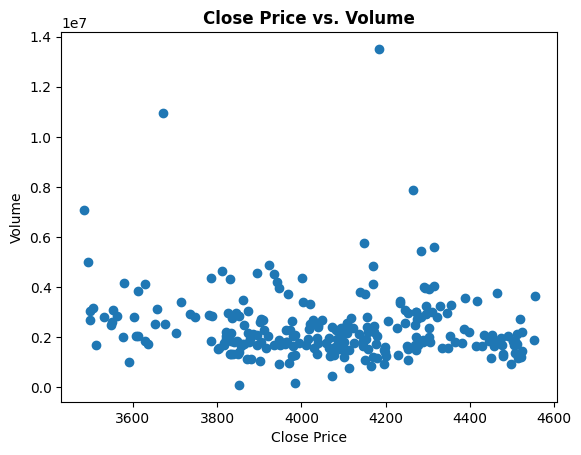

In [104]:
plt.scatter(df['close'], df['VOLUME'])
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.title('Close Price vs. Volume',weight= "bold")
plt.show()

In [105]:
df['5-Day Moving Avg'] = df['close'].rolling(window=5).mean()

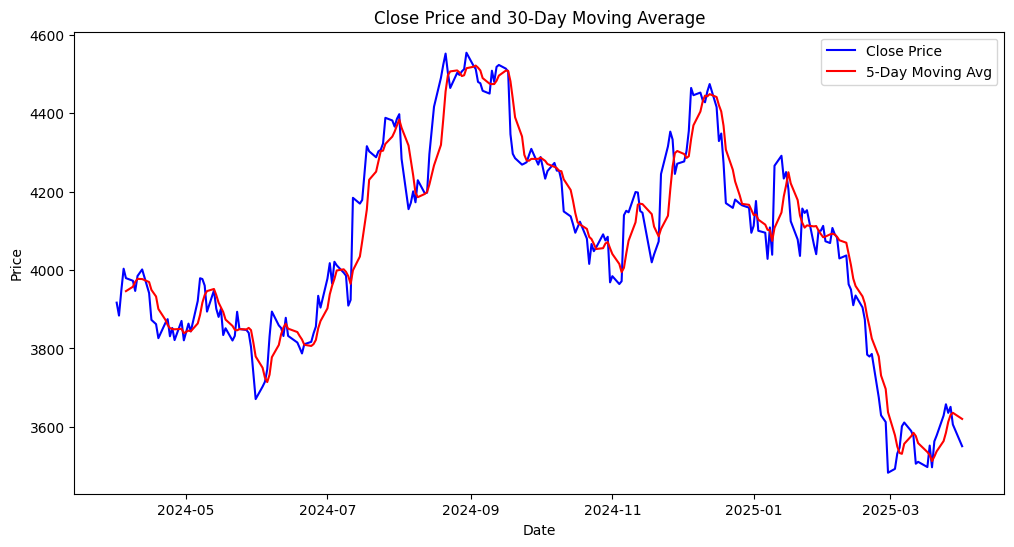

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['close'], label='Close Price', color='b')
plt.plot(df['Date'], df['5-Day Moving Avg'], label='5-Day Moving Avg', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and 30-Day Moving Average')
plt.legend()
plt.show()

In [107]:
df['Short_MA'] = df['close'].rolling(window=7).mean()
df['Long_MA'] = df['close'].rolling(window=21).mean()

In [108]:
df['Signal'] = np.where(df['Short_MA'] > df['Long_MA'], 1, -1)

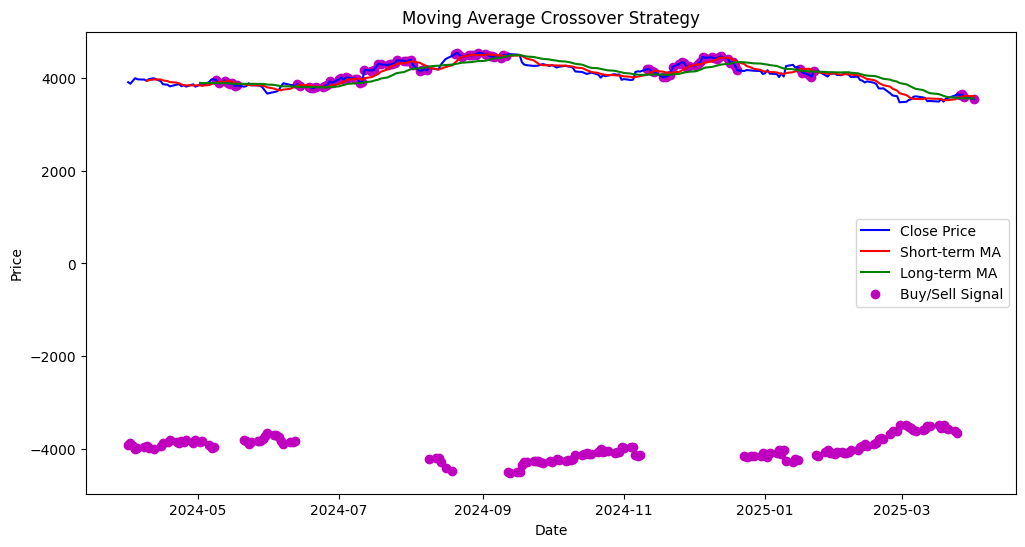

In [109]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['close'], label='Close Price',color='b')
plt.plot(df['Date'], df['Short_MA'], label='Short-term MA',color='r')
plt.plot(df['Date'], df['Long_MA'], label='Long-term MA',color='g')
plt.scatter(df['Date'], df['close'] * df['Signal'],label='Buy/Sell Signal', marker='o', color='m')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

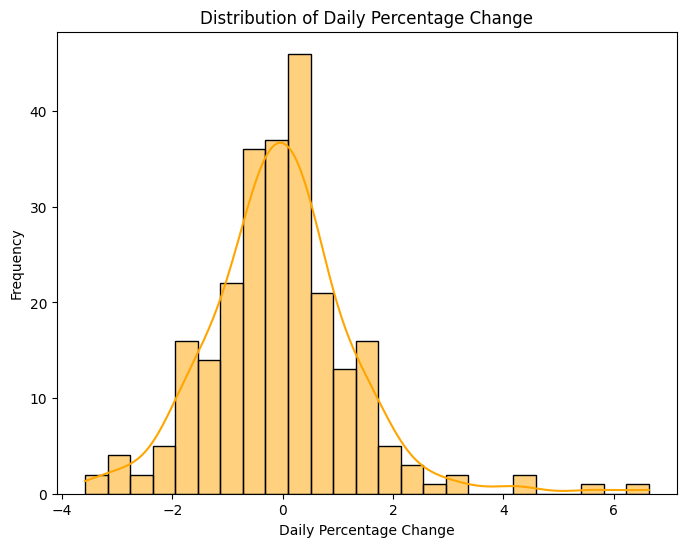

In [110]:
df['Daily_Price_Change'] = df['close'].pct_change() * 100

# Distribution of daily percentage change
plt.figure(figsize=(8, 6))
sns.histplot(df['Daily_Price_Change'].dropna(), kde=True,
color='orange')
plt.xlabel('Daily Percentage Change')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Percentage Change')
plt.show()

In [111]:
df['Moving_Avg_Close'] = df['close'].rolling(window=7).mean()

In [112]:
df.shape

(250, 19)

In [113]:
# Prepare the data for LSTM
X_train = df['close'].values.reshape(-1, 1)
y_train = df['close'].shift(-1).dropna().values

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the test data
test_ratio = 0.2
test_size = int(len(df) * test_ratio)
test_data = df[-test_size:]

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

In [114]:
# Reshape the data for LSTM
X_train_lstm = X_train_scaled[:-1].reshape(-1, 1, 1)
y_train_lstm = X_train_scaled[1:]

In [124]:
model = Sequential()
model.add(LSTM(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Set the number of epochs and batch size
epochs = 500
batch_size = 16

# Train the model with tqdm progress bar
for epoch in tqdm(range(epochs)):
    for i in range(0, len(X_train_lstm), batch_size):
        X_batch = X_train_lstm[i:i+batch_size]
        y_batch = y_train_lstm[i:i+batch_size]
        model.train_on_batch(X_batch, y_batch)

# Prepare the data for prediction
X_test = test_data['close'].values.reshape(-1, 1)
X_test_scaled = scaler.transform(X_test)
X_test_lstm = X_test_scaled.reshape(-1, 1, 1)

100%|██████████| 500/500 [01:05<00:00,  7.64it/s]


In [125]:
lstm_predictions = model.predict(X_test_lstm).flatten()

2/2 [==============================] - 0s 2ms/step


In [126]:
lstm_predictions = lstm_predictions.reshape(-1, 1)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

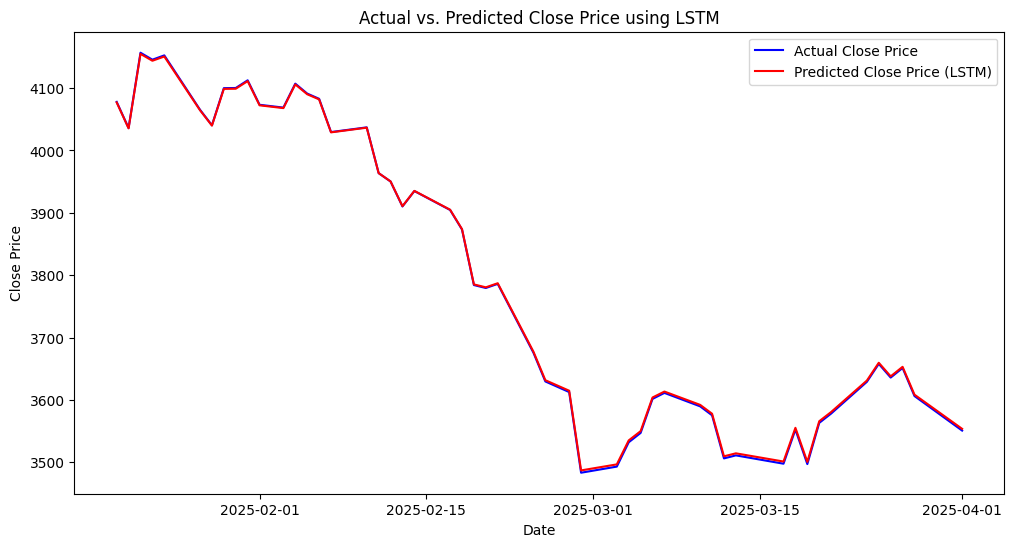

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['close'], label='Actual Close Price', color='b')
plt.plot(test_data['Date'], lstm_predictions, label='Predicted Close Price (LSTM)', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Price using LSTM')
plt.legend()
plt.show()


In [128]:
lstm_mae = mean_absolute_error(test_data['close'],lstm_predictions)
print("LSTM Mean Absolute Error:", lstm_mae)

LSTM Mean Absolute Error: 1.7123652343750109


In [129]:
rel_err = lstm_mae/np.mean(df['close'])
rel_acc = (1 - rel_err) * 100
print(f'{rel_acc:.2f}%')

99.96%


In [130]:
import pickle
with open('TCS_Stock_Predictor.pkl', 'wb') as file:
    pickle.dump(model, file)